# Analysis for clustering the data into 3 part variables for anomalies detection using KMEAN

In [63]:
## Import the needed modules for pre-processing data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data into data frame with pandas and show info of data for analysis and preprocessing data for give evidence analysis

In [64]:
data_path = "../../Data/Collection/data_raw.csv"

df = pd.read_csv(data_path)

print("Instructions of dataset: \n")

print(df.columns)

print(df.info())


Instructions of dataset: 

Index(['remote_addr', 'remote_usr', 'time_local', 'request_method',
       'request_url', 'http_version', 'status', 'body_bytes_sent',
       'http_referer', 'http_user_agent', 'http_x_forwarded_for',
       'request_length', 'request_time', 'upstream_response_time',
       'network_receive_bytes_per_second',
       'network_transmit_bytes_per_second'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48866 entries, 0 to 48865
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   remote_addr                        48866 non-null  object 
 1   remote_usr                         48866 non-null  object 
 2   time_local                         48866 non-null  object 
 3   request_method                     48866 non-null  object 
 4   request_url                        48866 non-null  object 
 5   http_version                     

### Data Information:
- Data existed in style of log file, so we have a different type of value in dataframe
- Include 16 columns with:  **4 floats, 3 int 64 and 9 objects**
- For reduce complexity, we will take a some feature for clustering job but some case will remove others out of dataframe
- Below is a list of features and their values for dataframe


In [65]:
df

,remote_addr,remote_usr,time_local,request_method,request_url,http_version,status,body_bytes_sent,http_referer,http_user_agent,http_x_forwarded_for,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second
0,10.0.0.2,-,17/Jun/2023:12:00:00 +0000,PUT,/items/adc73ff8-e13f-4b9b-8ff1-c092f5dba042,HTTP/1.1,200,89,-,python-requests/2.25.1,-,287,0.012,0.012,486185.12,697731.04
1,10.0.0.2,-,17/Jun/2023:12:00:00 +0000,GET,/items,HTTP/1.1,200,8500,-,python-requests/2.25.1,-,150,0.009,0.009,486185.12,697731.04
2,10.0.0.2,-,17/Jun/2023:12:00:00 +0000,GET,/items,HTTP/1.1,200,8500,-,python-requests/2.25.1,-,150,0.013,0.012,486185.12,697731.04
3,10.0.0.2,-,17/Jun/2023:12:00:00 +0000,GET,/items,HTTP/1.1,200,8499,-,python-requests/2.25.1,-,150,0.008,0.007,486185.12,697731.04
4,10.0.0.2,-,17/Jun/2023:12:00:00 +0000,GET,/items,HTTP/1.1,200,8500,-,python-requests/2.25.1,-,150,0.009,0.009,486185.12,697731.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48861,10.0.0.2,-,17/Jun/2023:12:42:33 +0000,GET,/items,HTTP/1.1,200,20660,-,python-requests/2.25.1,-,150,0.011,0.011,1025412.16,1470728.48
48862,10.0.0.2,-,17/Jun/2023:12:42:33 +0000,GET,/items,HTTP/1.1,200,20660,-,python-requests/2.25.1,-,150,0.008,0.009,1025412.16,1470728.48
48863,10.0.0.2,-,17/Jun/2023:12:42:33 +0000,DELETE,/items/d86fd195-92e7-429e-8b96-e5ba5daff746,HTTP/1.1,200,2,-,python-requests/2.25.1,-,209,0.012,0.012,1025412.16,1470728.48
48864,10.0.0.2,-,17/Jun/2023:12:42:33 +0000,POST,/items,HTTP/1.1,200,87,-,python-requests/2.25.1,-,229,0.013,0.014,1025412.16,1470728.48


## PreProcess for data become available to analyzing - A. Remove unnecessary labels out of dataframe

In [66]:
# Get the colume and check the uniques of the data fresh in the each colume
columes_with_non_unique = []
for column in df.columns:
    print("{column} with {unique} unique value".format(column=column, unique=len(df[column].unique())))
    if (len(df[column].unique()) == 1):
        columes_with_non_unique.append(column)

print(columes_with_non_unique)

remote_addr with 1 unique value
remote_usr with 1 unique value
time_local with 2554 unique value
request_method with 4 unique value
request_url with 5450 unique value
http_version with 2 unique value
status with 3 unique value
body_bytes_sent with 6485 unique value
http_referer with 2 unique value
http_user_agent with 4 unique value
http_x_forwarded_for with 1 unique value
request_length with 49 unique value
request_time with 334 unique value
upstream_response_time with 336 unique value
network_receive_bytes_per_second with 171 unique value
network_transmit_bytes_per_second with 171 unique value
['remote_addr', 'remote_usr', 'http_x_forwarded_for']


- We need take care about if not unique labels will reduced from the dataframe or encoding that about information helpful. So with 16 columns which huge number of columns will be unnecessary for clustering base on purpose into anomalies
    1. time_local: Don't take care about much because not use for clustering
    2. remote_addr : Because on the system, use the orchestrator, anything is close and just through loadblancer will not collection real ip of user
    3. remote_usr: Reason like remote_addr
    4. http_referer: Reason like remote_addr (Sometime it have different but not significantly)
    5. http_x_forwarded_for: Reason like above

In [67]:
columes_with_non_unique.append("http_referer")
columes_with_non_unique.append("time_local")
print(columes_with_non_unique)
df = df.drop(columns=columes_with_non_unique)
df

['remote_addr', 'remote_usr', 'http_x_forwarded_for', 'http_referer', 'time_local']


,request_method,request_url,http_version,status,body_bytes_sent,http_user_agent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second
0,PUT,/items/adc73ff8-e13f-4b9b-8ff1-c092f5dba042,HTTP/1.1,200,89,python-requests/2.25.1,287,0.012,0.012,486185.12,697731.04
1,GET,/items,HTTP/1.1,200,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04
2,GET,/items,HTTP/1.1,200,8500,python-requests/2.25.1,150,0.013,0.012,486185.12,697731.04
3,GET,/items,HTTP/1.1,200,8499,python-requests/2.25.1,150,0.008,0.007,486185.12,697731.04
4,GET,/items,HTTP/1.1,200,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04
...,...,...,...,...,...,...,...,...,...,...,...
48861,GET,/items,HTTP/1.1,200,20660,python-requests/2.25.1,150,0.011,0.011,1025412.16,1470728.48
48862,GET,/items,HTTP/1.1,200,20660,python-requests/2.25.1,150,0.008,0.009,1025412.16,1470728.48
48863,DELETE,/items/d86fd195-92e7-429e-8b96-e5ba5daff746,HTTP/1.1,200,2,python-requests/2.25.1,209,0.012,0.012,1025412.16,1470728.48
48864,POST,/items,HTTP/1.1,200,87,python-requests/2.25.1,229,0.013,0.014,1025412.16,1470728.48


### PreProcess for data become available to analyzing - B. Encoding for formatting label need can be changed into the numberic form

**After A step, we have 11 columns so current state of DF have existed a something a feature cannot be used for clustering purposes**
1. request_method: Include 4 method CRUD --> Can be using the **One hot encoding to make the this feature is clear -- Equalation**
2. request_uri + status: That can be to understand the URI can take be available base on flowing request and request reponse
    - Idea to make sense in here: Can come from combine request_uri and request_reponse can effected for each others
    - So with response 2xx and 3xx + with URI --> **Encoding into 1 with label available request - 0 for reverse**
    - With response 4xx and 5xx + with URI --> **Encoding into 1 with label error request - 0 for reverse**
3. http_version: So just in current, we will have 4 type of http_version (1.0, 1.1, 2.0, 3.0) but in case of purpose is just want release 1.0, 1.1 (Reason why becase i don't active that protocol on my web server, It just 1.1 or 1.0 maybe 2.0 or 3.0 can modify but it unnecessary) --> **Encoding by one hot encoding**
4. http_user_agent: That really easy to understand into web browser common and suppicious requests --> **Encoding into 1 with common and 0 with suppicious agent**


B1. request_method

In [68]:
enc_data = pd.get_dummies(df['request_method']).astype('Int64')
df = df.join(enc_data)
df = df.drop(columns=['request_method'])
df

,request_url,http_version,status,body_bytes_sent,http_user_agent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second,DELETE,GET,POST,PUT
0,/items/adc73ff8-e13f-4b9b-8ff1-c092f5dba042,HTTP/1.1,200,89,python-requests/2.25.1,287,0.012,0.012,486185.12,697731.04,0,0,0,1
1,/items,HTTP/1.1,200,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04,0,1,0,0
2,/items,HTTP/1.1,200,8500,python-requests/2.25.1,150,0.013,0.012,486185.12,697731.04,0,1,0,0
3,/items,HTTP/1.1,200,8499,python-requests/2.25.1,150,0.008,0.007,486185.12,697731.04,0,1,0,0
4,/items,HTTP/1.1,200,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48861,/items,HTTP/1.1,200,20660,python-requests/2.25.1,150,0.011,0.011,1025412.16,1470728.48,0,1,0,0
48862,/items,HTTP/1.1,200,20660,python-requests/2.25.1,150,0.008,0.009,1025412.16,1470728.48,0,1,0,0
48863,/items/d86fd195-92e7-429e-8b96-e5ba5daff746,HTTP/1.1,200,2,python-requests/2.25.1,209,0.012,0.012,1025412.16,1470728.48,1,0,0,0
48864,/items,HTTP/1.1,200,87,python-requests/2.25.1,229,0.013,0.014,1025412.16,1470728.48,0,0,1,0


B2. request_uri + status

In [69]:
available_request = []
error_request = []
for i in df['status']:
    if i >= 100 and i <= 399:
        available_request.append(1)
        error_request.append(0)
    elif i >= 400 and i <= 599:
        available_request.append(0)
        error_request.append(1)
        
df['available_request'] = available_request
df['error_request'] = error_request
df = df.drop(columns=['request_url', 'status'])
df

,http_version,body_bytes_sent,http_user_agent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second,DELETE,GET,POST,PUT,available_request,error_request
0,HTTP/1.1,89,python-requests/2.25.1,287,0.012,0.012,486185.12,697731.04,0,0,0,1,1,0
1,HTTP/1.1,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0
2,HTTP/1.1,8500,python-requests/2.25.1,150,0.013,0.012,486185.12,697731.04,0,1,0,0,1,0
3,HTTP/1.1,8499,python-requests/2.25.1,150,0.008,0.007,486185.12,697731.04,0,1,0,0,1,0
4,HTTP/1.1,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48861,HTTP/1.1,20660,python-requests/2.25.1,150,0.011,0.011,1025412.16,1470728.48,0,1,0,0,1,0
48862,HTTP/1.1,20660,python-requests/2.25.1,150,0.008,0.009,1025412.16,1470728.48,0,1,0,0,1,0
48863,HTTP/1.1,2,python-requests/2.25.1,209,0.012,0.012,1025412.16,1470728.48,1,0,0,0,1,0
48864,HTTP/1.1,87,python-requests/2.25.1,229,0.013,0.014,1025412.16,1470728.48,0,0,1,0,1,0


B3. http_version

In [70]:
enc_data = pd.get_dummies(df['http_version']).astype('Int64')
df = df.join(enc_data)
df = df.drop(columns=['http_version'])
df

,body_bytes_sent,http_user_agent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second,DELETE,GET,POST,PUT,available_request,error_request,HTTP/1.0,HTTP/1.1
0,89,python-requests/2.25.1,287,0.012,0.012,486185.12,697731.04,0,0,0,1,1,0,0,1
1,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0,0,1
2,8500,python-requests/2.25.1,150,0.013,0.012,486185.12,697731.04,0,1,0,0,1,0,0,1
3,8499,python-requests/2.25.1,150,0.008,0.007,486185.12,697731.04,0,1,0,0,1,0,0,1
4,8500,python-requests/2.25.1,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48861,20660,python-requests/2.25.1,150,0.011,0.011,1025412.16,1470728.48,0,1,0,0,1,0,0,1
48862,20660,python-requests/2.25.1,150,0.008,0.009,1025412.16,1470728.48,0,1,0,0,1,0,0,1
48863,2,python-requests/2.25.1,209,0.012,0.012,1025412.16,1470728.48,1,0,0,0,1,0,0,1
48864,87,python-requests/2.25.1,229,0.013,0.014,1025412.16,1470728.48,0,0,1,0,1,0,0,1


B4. http_user_agent

In [71]:
unique_agent = df['http_user_agent'].unique()
print(unique_agent)
from user_agents import parse
valid_user_agent = []
supicious_user_agent = []
for agent in df['http_user_agent']:
    user_agent = parse(agent)
    if user_agent.is_pc or user_agent.is_mobile:
        valid_user_agent.append(1)
        supicious_user_agent.append(0)
    else:
        valid_user_agent.append(0)
        supicious_user_agent.append(1)

df['valid_user_agent'] = valid_user_agent
df['supicious_user_agent'] = supicious_user_agent
df = df.drop(columns=['http_user_agent'])
df    

['python-requests/2.25.1'
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
 'ApacheBench/2.3' 'curl/7.81.0']


,body_bytes_sent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second,DELETE,GET,POST,PUT,available_request,error_request,HTTP/1.0,HTTP/1.1,valid_user_agent,supicious_user_agent
0,89,287,0.012,0.012,486185.12,697731.04,0,0,0,1,1,0,0,1,0,1
1,8500,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1
2,8500,150,0.013,0.012,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1
3,8499,150,0.008,0.007,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1
4,8500,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48861,20660,150,0.011,0.011,1025412.16,1470728.48,0,1,0,0,1,0,0,1,0,1
48862,20660,150,0.008,0.009,1025412.16,1470728.48,0,1,0,0,1,0,0,1,0,1
48863,2,209,0.012,0.012,1025412.16,1470728.48,1,0,0,0,1,0,0,1,0,1
48864,87,229,0.013,0.014,1025412.16,1470728.48,0,0,1,0,1,0,0,1,0,1


B5. Fill the blank value ('-') by 0 value to easy usability

In [72]:
df = df.replace("-", 0)

Conclusion: Applied feature engineering, **dataframe become 16 columns** with a replace by new volume have number not label
Applied model Kmeans to separate dataframe into *3 type of request* - normal vs loading vs webattack <br>

## Kmeans

In [73]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

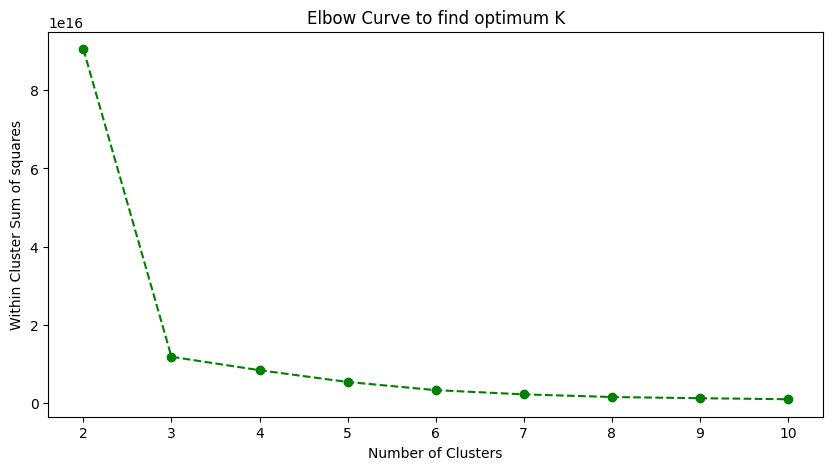

In [74]:
# df = shuffle(df)
# df.reset_index(inplace = True, drop= True)
k = list(range(2, 11))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

Especially elbow curve split the data into 3 clusters is the optimize, so with K=3 is good enough

In [75]:
kmean3 = KMeans(n_clusters=3)
kmean3.fit(df)
silhouette_score_average = silhouette_score(df, kmean3.predict(df))
print('Silhoutte score for rating model Kmeans3: ', silhouette_score_average)
y_pred = kmean3.fit_predict(df)

df['cluster_kmeans'] = y_pred+1

df

Silhoutte score for rating model Kmeans3:  0.823409503461155


,body_bytes_sent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second,DELETE,GET,POST,PUT,available_request,error_request,HTTP/1.0,HTTP/1.1,valid_user_agent,supicious_user_agent,cluster_kmeans
0,89,287,0.012,0.012,486185.12,697731.04,0,0,0,1,1,0,0,1,0,1,1
1,8500,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1,1
2,8500,150,0.013,0.012,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1,1
3,8499,150,0.008,0.007,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1,1
4,8500,150,0.009,0.009,486185.12,697731.04,0,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48861,20660,150,0.011,0.011,1025412.16,1470728.48,0,1,0,0,1,0,0,1,0,1,1
48862,20660,150,0.008,0.009,1025412.16,1470728.48,0,1,0,0,1,0,0,1,0,1,1
48863,2,209,0.012,0.012,1025412.16,1470728.48,1,0,0,0,1,0,0,1,0,1,1
48864,87,229,0.013,0.014,1025412.16,1470728.48,0,0,1,0,1,0,0,1,0,1,1


In [76]:
# calculate the centroils for each of row
centroids = kmean3.cluster_centers_
centroids = pd.DataFrame(centroids, columns=list(df.columns).remove("cluster_kmeans"))
centroids.index = np.arange(1, len(centroids) + 1)
col = list(df.columns)
col.remove("cluster_kmeans")
centroids.columns = col
centroids

,body_bytes_sent,request_length,request_time,upstream_response_time,network_receive_bytes_per_second,network_transmit_bytes_per_second,DELETE,GET,POST,PUT,available_request,error_request,HTTP/1.0,HTTP/1.1,valid_user_agent,supicious_user_agent
1,7054.197078,189.307165,0.016937,0.016921,6.793259e+05,9.742685e+05,0.151178,0.538742,0.156497,0.153583,1.000000,-3.760826e-19,0.082802,0.917198,0.000656,0.999344
2,13339.224912,123.666136,0.022253,0.022234,5.093658e+06,7.206081e+06,0.047308,0.859509,0.045874,0.047308,0.999841,1.592864e-04,0.723797,0.276203,0.000319,0.999681
3,10127.725837,131.454912,0.049274,0.049262,2.329388e+06,3.287955e+06,0.059061,0.823941,0.058268,0.058730,1.000000,-6.437450e-20,0.645306,0.354694,0.000595,0.999405


<Axes: xlabel='request_length', ylabel='body_bytes_sent'>

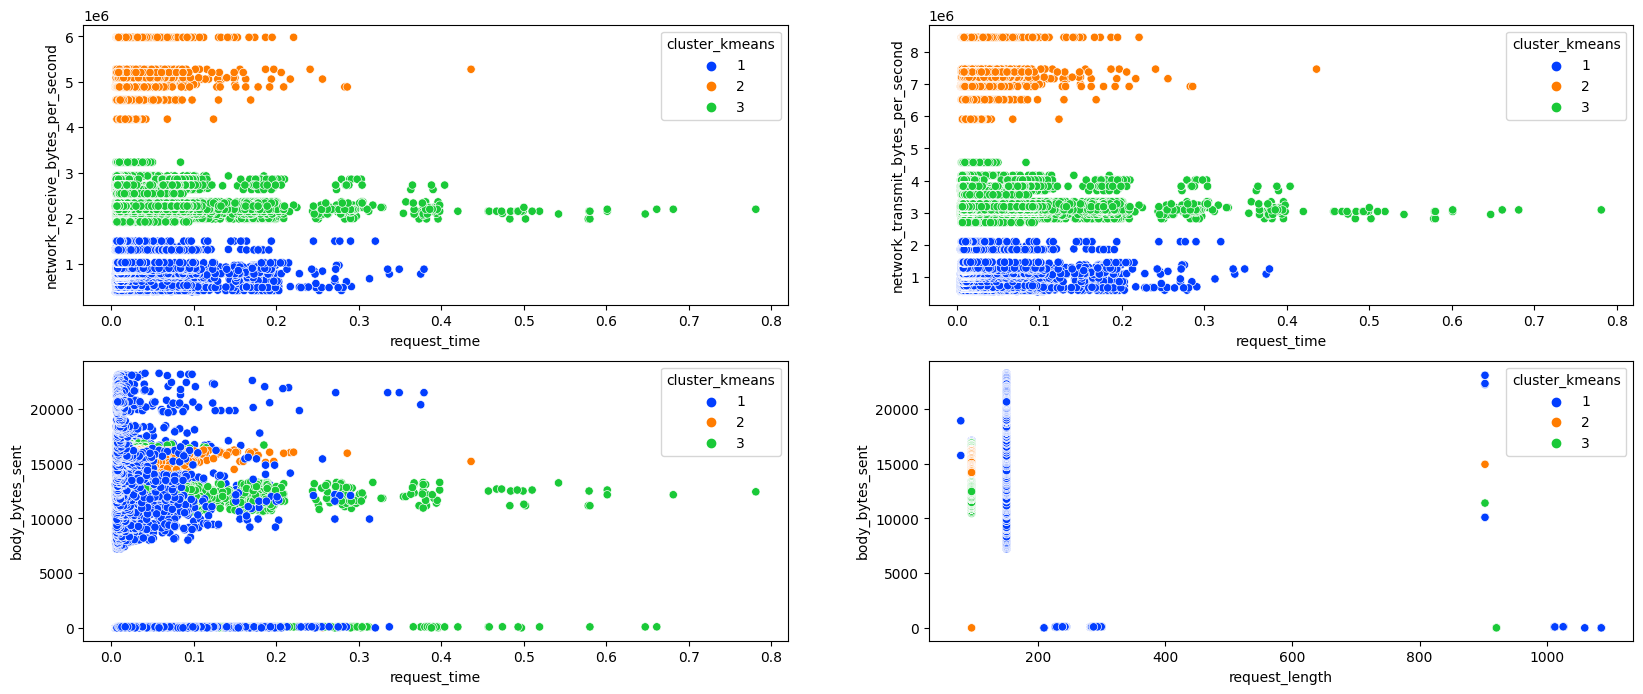

In [77]:
plt.figure(figsize=(20,8))
sns.set_palette("pastel")
ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(x=df['request_time'], y=df['network_receive_bytes_per_second'], hue=df['cluster_kmeans'], palette='bright')
ax2= plt.subplot(2, 2, 2)
sns.scatterplot(x=df['request_time'], y=df['network_transmit_bytes_per_second'], hue=df['cluster_kmeans'], palette='bright')
ax3 = plt.subplot(2, 2, 3)
sns.scatterplot(x=df['request_time'], y=df['body_bytes_sent'], hue=df['cluster_kmeans'], palette='bright')
ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(x=df['request_length'], y=df['body_bytes_sent'], hue=df['cluster_kmeans'], palette='bright')


Comment:
1. Have a split particularly similar into the seperate cluster
2. With requested with low request time an body byte sent low to high --> In cluster 1
3. With compared between request time with network bandwidth, we receive the seperate cluster with different part
4. So that why we can prove that the cluster 3 and 2 will be anomalies data and should be not right in situation network bandwidth with low --> Normal request will in cluster 1 --> Anomalious request will be concentrated because some kind of situation occur when bot request

cluster_kmeans
1    27451
3    15137
2     6278
Name: count, dtype: int64
48866
cluster_kmeans
normal       27402
webattack    15186
benchmark     6278
Name: count, dtype: int64
48866
cluster_kmeans
normal       27413
webattack    15178
benchmark     6275
Name: count, dtype: int64
48866


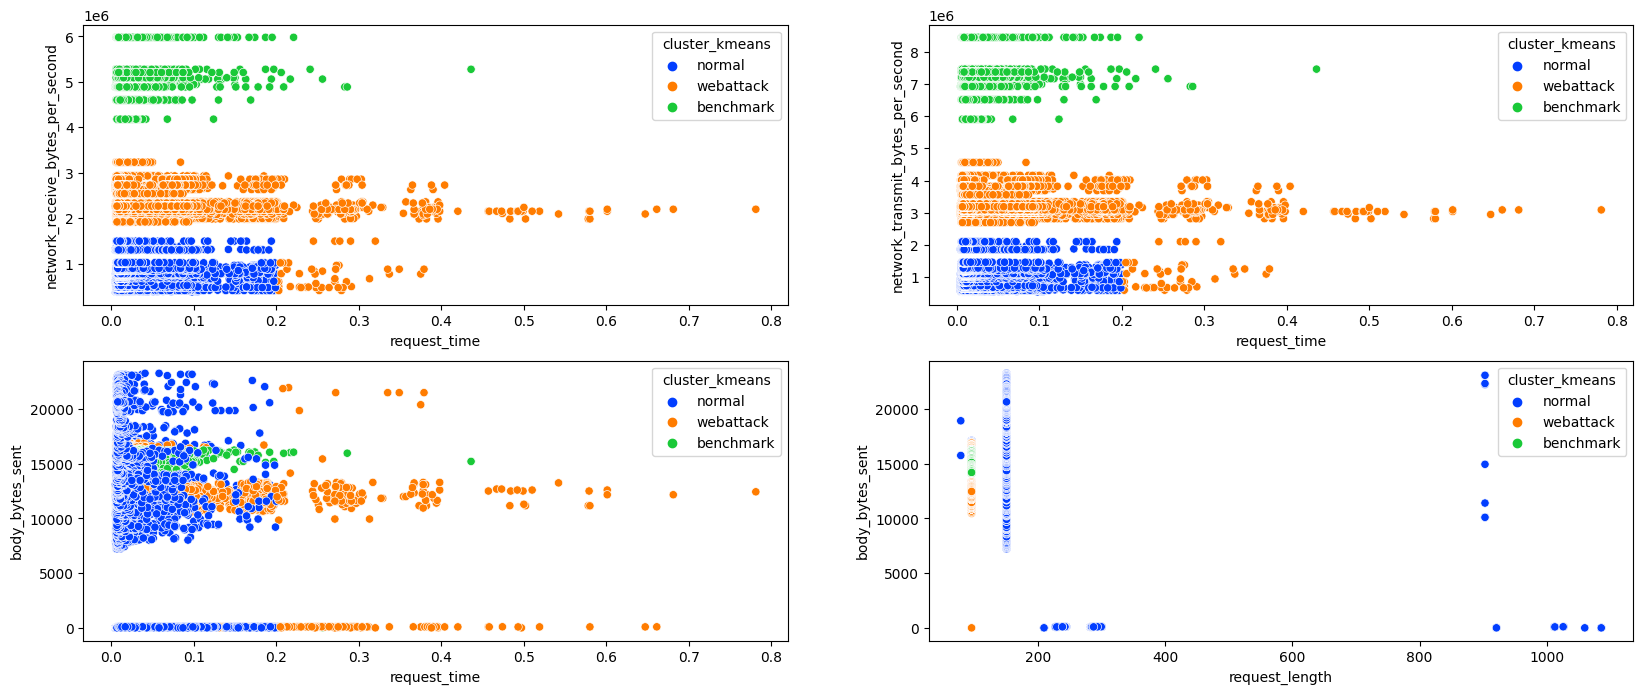

In [78]:
# Fix correction situation
'''
Base on analysis can give decision with
Cluster 1: Normal req (Max)
Cluster 2: Anomalies Type 1: Loading req (Min)
Cluster 3: Anomalies Type 2: Attack Web (DDoS) (Average)

--> Give a decision for IDS by Desensity of the cluster if Anomalie Type 1 + Type 2 is out load of 30% percent of ammount requests for current state --> Turn on flag
'''
# Statistic about density of label assigin by kmean
print(df['cluster_kmeans'].value_counts())
print(sum(df['cluster_kmeans'].value_counts().values))

# Change label number of clusters into
df.loc[(df['request_time'] <= 0.2) & (df['network_receive_bytes_per_second'] <= 1900000), ['cluster_kmeans']] = "normal"
df.loc[((df['request_time'] > 0.2) & (df['network_receive_bytes_per_second'] <= 3500000)) | ((df['network_receive_bytes_per_second'] > 1900000) & (df['network_receive_bytes_per_second'] <= 3500000)), ['cluster_kmeans']] = "webattack"
df.loc[(df['network_receive_bytes_per_second'] > 3500000), ['cluster_kmeans']] = "benchmark"
print(df['cluster_kmeans'].value_counts())
print(sum(df['cluster_kmeans'].value_counts().values))

# Correction for cluster
# Situation: Valid response, valid user agent
df.loc[(df['valid_user_agent'] == 1) & (df['available_request'] == 1), ['cluster_kmeans']] = "normal"
df.loc[(df['valid_user_agent'] == 0) & (df['available_request'] == 0), ['cluster_kmeans']] = "webattack"
df.loc[(df['valid_user_agent'] == 1) & (df['available_request'] == 0), ['cluster_kmeans']] = "webattack"
print(df['cluster_kmeans'].value_counts())
print(sum(df['cluster_kmeans'].value_counts().values))

plt.figure(figsize=(20,8))
sns.set_palette("pastel")
ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(x=df['request_time'], y=df['network_receive_bytes_per_second'], hue=df['cluster_kmeans'], palette='bright')
ax2= plt.subplot(2, 2, 2)
sns.scatterplot(x=df['request_time'], y=df['network_transmit_bytes_per_second'], hue=df['cluster_kmeans'], palette='bright')
ax3 = plt.subplot(2, 2, 3)
sns.scatterplot(x=df['request_time'], y=df['body_bytes_sent'], hue=df['cluster_kmeans'], palette='bright')
ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(x=df['request_length'], y=df['body_bytes_sent'], hue=df['cluster_kmeans'], palette='bright')

df.to_csv('../../Data/Collection/result_kmeans.csv')
